In [1]:
import pandas as pd
import requests
import json
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import xarray

In [2]:
os.makedirs("./idw", exist_ok=True)

r_estaciones = requests.api.get("https://Geopiragua.corantioquia.gov.co/api/v1/estaciones")

estaciones = json.loads(r_estaciones.content)

df_ppt = pd.DataFrame({int(est["codigo"]):{"lat":float(est["latitud"]), "lon":float(est["longitud"])} for est in estaciones["estaciones"] if str(est["tipo"]) == "1"}).T

now = datetime.datetime.now()

start_date = (now - pd.Timedelta("7d")).strftime("%Y-%m-%d")


for i in df_ppt.index:
    r_ppt = requests.api.get(f"https://Geopiragua.corantioquia.gov.co/api/v1/estaciones/{i}/precipitacion?fecha__gte=2022-05-30&fecha__gte=2022-06-05?history")

    data = json.loads(r_ppt.content)
    
    try:
        df_ppt.loc[i, "ppt"] = np.array([i["muestra"] for i in data["results"] if float(i["muestra"]) >= 0]).astype(float).sum()
    except:
        print(i)

df_ppt.dropna().to_csv(f"{start_date}.csv", index = False)

1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
6
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
8
80
81
82
83
84
85
86
87
88
89
9
90
91
92
93
94
95
96
97
98


In [ ]:
https://geopiragua.corantioquia.gov.co/api/v1/developers

<AxesSubplot:>

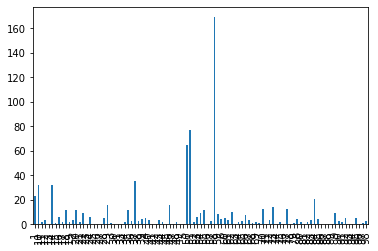

In [82]:
df_ppt.ppt.plot(kind = "bar")

In [89]:
header = f"""<OGRVRTDataSource>
    <OGRVRTLayer name="dem">
        <SrcDataSource>{start_date}.csv</SrcDataSource>
        <GeometryType>wkbPoint</GeometryType>
        <GeometryField encoding="PointFromColumns" x="lon" y="lat" z="ppt"/>
    </OGRVRTLayer>
</OGRVRTDataSource>"""

In [90]:
with open(f"{start_date}.vrt", "w") as f:
    f.write(header)

In [91]:
os.system(f"gdal_grid -zfield 'ppt' -a invdist:power=2.0:smoothing=1.0  -outsize 400 400 -of GTiff -ot Float64 -l dem {start_date}.vrt {start_date}.tiff")


Failed to find field ppt on layer dem, skipping.


ERROR 1: Failed to find layer 'dem' on datasource '2022-05-31.csv'.


256

In [92]:
df_ppt = df_ppt.dropna()

In [93]:
diff_lat = abs(df_ppt.lat.min() - df_ppt.lat.max())

lats = np.linspace(df_ppt.lat.min() - diff_lat * 0.1, df_ppt.lat.max() + diff_lat * 0.1, 200)



In [94]:
diff_lon = abs(df_ppt.lon.min() - df_ppt.lon.max())

lons = np.linspace(df_ppt.lon.min() - diff_lon * 0.1, df_ppt.lon.max() + diff_lon * 0.1, 200)

In [95]:
x, y = np.meshgrid(lats, lons)

In [96]:
from photutils.utils import ShepardIDWInterpolator as idw

In [106]:
interp = idw(np.c_[df_ppt.lon, df_ppt.lat], df_ppt.ppt)

In [111]:
lluvia = interp(np.c_[x.ravel(), y.ravel()], power = 2).reshape(x.shape)
lluvia[lluvia < 1] = np.nan

,lat,lon,ppt
1,7.492328,-74.868139,0.000
11,6.059778,-75.792333,7.366
12,5.596583,-75.813861,9.144
13,5.655417,-75.882556,0.762
14,5.790806,-75.842722,2.032
...,...,...,...
91,5.769583,-75.736889,11.176
92,6.250038,-75.583064,2.032
95,5.911333,-75.659417,24.638
97,7.063944,-75.685972,5.842


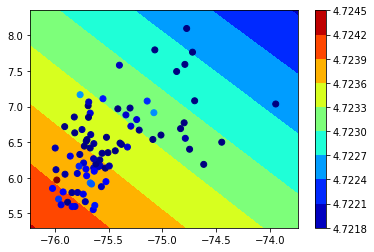

In [105]:
plt.contourf(lons, lats, lluvia, cmap = "jet")
plt.colorbar()
plt.scatter(df_ppt.lon, df_ppt.lat, c = df_ppt.ppt, cmap = "jet")


In [74]:
data = {"y": str(lats.tolist()).replace("nan", "null"),
        "x": str(lons.tolist()).replace("nan", "null"),
        "z": str(lluvia.tolist()).replace("nan", "null")}

TypeError: imshow() missing 1 required positional argument: 'X'

In [28]:
lat_max, lon_min = 12.728862, -80.099554
lat_min, lon_max = 2.207441, -70.348504

In [ ]:
"#3574F3"
"#5866E7"
"#7A5EE0"
"#AC6AC2"
"#C79789"


In [27]:
import numpy as np
import geopandas as gpd
import requests
import json
from shapely.geometry import Point

from osgeo import gdal
import rioxarray as rio
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime

%matplotlib inline

In [21]:
shp_file = "./puntos.shp"
rst_file = './interpolado.tif'

In [85]:
f"https://geopiragua.corantioquia.gov.co/api/v1/
estaciones/{i}/precipitacion?fecha__gte=2022-05-30&fecha__gte=2022-06-05"

SyntaxError: EOL while scanning string literal (245686117.py, line 1)

In [ ]:
https://geopiragua.corantioquia.gov.co/api/v1/estaciones/2/precipitacion?fecha__gte=2022-05-30&fecha__lt=2022-06-05&page=2&size=288

In [14]:
r_ppt.content

b'{"next":"http://geopiragua.corantioquia.gov.co/api/v1/precipitacion/98?fecha__gte=2022-05-30&fecha__lt=2022-06-06&history=&page=2","previous":null,"count":2016,"author":false,"results":[{"fecha":"2022-06-05 23:55","muestra":"0.000","x":1654473300000.0},{"fecha":"2022-06-05 23:50","muestra":"0.000","x":1654473000000.0},{"fecha":"2022-06-05 23:45","muestra":"0.000","x":1654472700000.0},{"fecha":"2022-06-05 23:40","muestra":"0.000","x":1654472400000.0},{"fecha":"2022-06-05 23:35","muestra":"0.000","x":1654472100000.0},{"fecha":"2022-06-05 23:30","muestra":"0.000","x":1654471800000.0},{"fecha":"2022-06-05 23:25","muestra":"0.000","x":1654471500000.0},{"fecha":"2022-06-05 23:20","muestra":"0.000","x":1654471200000.0},{"fecha":"2022-06-05 23:15","muestra":"0.000","x":1654470900000.0},{"fecha":"2022-06-05 23:10","muestra":"0.000","x":1654470600000.0},{"fecha":"2022-06-05 23:05","muestra":"0.000","x":1654470300000.0},{"fecha":"2022-06-05 23:00","muestra":"0.000","x":1654470000000.0},{"fecha"

In [17]:
os.makedirs("./idw", exist_ok=True)

r_estaciones = requests.api.get("https://geopiragua.corantioquia.gov.co/api/v1/estaciones/")

estaciones = json.loads(r_estaciones.content)

df_ppt = pd.DataFrame({int(est["codigo"]):{"lat":float(est["latitud"]), "lon":float(est["longitud"])} for est in estaciones["estaciones"] if str(est["tipo"]) == "1"}).T

now = datetime.datetime.now()

start_date = (now - pd.Timedelta("7d")).strftime("%Y-%m-%d")


for i in df_ppt.index:
    r_ppt = requests.api.get(f"https://geopiragua.corantioquia.gov.co/api/v1/precipitacion/{i}?fecha__gte=2022-05-30&fecha__lt=2022-06-06&page=1&size=2016")

    data = json.loads(r_ppt.content)
    
#     try:
    df_ppt.loc[i, "ppt"] = np.array([i["muestra"] for i in data["results"] if float(i["muestra"]) >= 0]).astype(float).sum()
#     except:
#         print(i)

df_ppt = df_ppt.dropna()#.to_csv(f"{start_date}.csv", index = False)

In [18]:
 json.loads(r_ppt.content)

{'next': None,
 'previous': None,
 'count': 2016,
 'author': False,
 'results': [{'fecha': '2022-06-05 23:55',
   'muestra': '0.000',
   'x': 1654473300000.0},
  {'fecha': '2022-06-05 23:50', 'muestra': '0.000', 'x': 1654473000000.0},
  {'fecha': '2022-06-05 23:45', 'muestra': '0.000', 'x': 1654472700000.0},
  {'fecha': '2022-06-05 23:40', 'muestra': '0.000', 'x': 1654472400000.0},
  {'fecha': '2022-06-05 23:35', 'muestra': '0.000', 'x': 1654472100000.0},
  {'fecha': '2022-06-05 23:30', 'muestra': '0.000', 'x': 1654471800000.0},
  {'fecha': '2022-06-05 23:25', 'muestra': '0.000', 'x': 1654471500000.0},
  {'fecha': '2022-06-05 23:20', 'muestra': '0.000', 'x': 1654471200000.0},
  {'fecha': '2022-06-05 23:15', 'muestra': '0.000', 'x': 1654470900000.0},
  {'fecha': '2022-06-05 23:10', 'muestra': '0.000', 'x': 1654470600000.0},
  {'fecha': '2022-06-05 23:05', 'muestra': '0.000', 'x': 1654470300000.0},
  {'fecha': '2022-06-05 23:00', 'muestra': '0.000', 'x': 1654470000000.0},
  {'fecha': '20

In [102]:
r_estaciones = requests.api.get("https://geopiragua.corantioquia.gov.co/api/v1/estaciones/")

r_estaciones = json.loads(r_estaciones.content)

In [105]:
r_estaciones

{'estaciones': [{'altitud': 85,
   'codigo': '1',
   'fuente': 'Quebrada Juan Vara',
   'id': 1,
   'latitud': '7.4923280',
   'longitud': '-74.8681390',
   'municipio': 80,
   'nivel_subsiguiente': 29,
   'territorial': 7,
   'tipo': 1,
   'tipo_nombre': 'Pluviógrafo',
   'ubicacion': 'Edificio de la Alcaldía',
   'umbral': 1,
   'url': 'http://geopiragua.corantioquia.gov.co/api/v1/estaciones/1/',
   'municipio_nombre': 'Zaragoza',
   'nivel_subsiguiente_nombre': 'R. Tigui - NSS'},
  {'altitud': 1500,
   'codigo': '10',
   'fuente': 'Quebrada La Cristalina',
   'id': 10,
   'latitud': '5.8554440',
   'longitud': '-75.8261670',
   'municipio': 69,
   'nivel_subsiguiente': 13,
   'territorial': 6,
   'tipo': 1,
   'tipo_nombre': 'Pluviógrafo',
   'ubicacion': 'Planta de Tratamiento de Agua Potable - PTAP',
   'umbral': 1,
   'url': 'http://geopiragua.corantioquia.gov.co/api/v1/estaciones/10/',
   'municipio_nombre': 'Tarso',
   'nivel_subsiguiente_nombre': 'R. FR. y Otros Directos al Ca

In [104]:
s  = pd.DataFrame(r_estaciones)

ValueError: All arrays must be of the same length

In [111]:
r_estaciones = requests.api.get("https://geopiragua.corantioquia.gov.co/api/v1/estaciones/")

estaciones = json.loads(r_estaciones.content)

df_ppt = pd.DataFrame({int(est["codigo"]):{"lat":float(est["latitud"]), "lon":float(est["longitud"])} for est in estaciones["estaciones"] if str(est["tipo"]) == "1"}).T


In [112]:
df_ppt

,lat,lon
1,7.492328,-74.868139
10,5.855444,-75.826167
11,6.059778,-75.792333
12,5.596583,-75.813861
13,5.655417,-75.882556
...,...,...
94,6.951863,-73.958170
95,5.911333,-75.659417
96,6.842278,-75.217667
97,7.063944,-75.685972


In [113]:
### Consultar estaciones
estaciones = pd.read_csv('https://geopiragua.corantioquia.gov.co/api/v1/estaciones/?downloadfile')
estaciones.rename(columns={'código': 'codigo'}, inplace=True)
estaciones

,codigo,tipo,municipio,territorial,nivel_subsiguiente,fuente,altitud,latitud,longitud,ubicacion
0,4002,Calidad del Agua,Cáceres,Panzenú,R. Taraza y otros directos cauca (md) - NSS,Río Cauca,81.0,7.584083,-75.348667,NaN
1,4001,Calidad del Agua,La Pintada,Cartama,Directos R. Cauca (mi) - R. Amagá y Q. Sinifan...,Río Cauca,608.0,5.745528,-75.606417,NaN
2,1054,Limnígrafo,Amalfi,Zenufaná,R. Bajo Porce - NSS,Rio Porce,NaN,6.894730,-75.049792,NaN
3,1007,Limnígrafo,Andes,Citará,R. San Juan - SZH (md),Río Taparto,1508.0,5.703250,-75.964778,NaN
4,1027,Limnígrafo,Andes,Citará,R. San Juan - SZH (md),Quebrada San Agustín,1777.0,5.624265,-75.943077,NaN
...,...,...,...,...,...,...,...,...,...,...
219,AN_MED_18,Registro Manual,Medellín,Aburrá Norte,Rio Aburrá - NSS,NaN,1000.0,6.176778,-75.660139,San Antonio
220,AN_MED_2,Registro Manual,Medellín,Aburrá Norte,Rio Aburrá - NSS,NaN,1000.0,6.251672,-75.499851,Santa Elena
221,AN_MED_3,Registro Manual,Medellín,Aburrá Norte,Rio Aburrá - NSS,NaN,1000.0,6.206572,-75.614467,Altavista
222,AN_MED_4,Registro Manual,Medellín,Aburrá Norte,Rio Aburrá - NSS,NaN,1000.0,6.178475,-75.661826,San Antonio


In [159]:
for i, filtros in estaciones.loc[estaciones.tipo == 'Pluviógrafo'].iterrows():
    filtros = {"estacion":filtros.codigo, "inicio":"2022-05-30", "fin":"2022-06-05"}
    url="https://geopiragua.corantioquia.gov.co/api/v1/precipitacion/{estacion}?fecha__gte={inicio}&fecha__lt={fin}&downloadfile".format(**filtros)
    
    

In [162]:
dff

,id,fecha,muestra,calidad
0,79258500,2022-06-04 23:55,0.0,Buena
1,79258499,2022-06-04 23:50,0.0,Buena
2,79258240,2022-06-04 23:45,0.0,Buena
3,79258239,2022-06-04 23:40,0.0,Buena
4,79258238,2022-06-04 23:35,0.0,Buena
...,...,...,...,...
1723,79088024,2022-05-30 00:20,0.0,Buena
1724,79087687,2022-05-30 00:15,0.0,Buena
1725,79087686,2022-05-30 00:10,0.0,Buena
1726,79087685,2022-05-30 00:05,0.0,Buena


In [161]:
dff = pd.read_csv(url)

In [143]:
f = requests.get(url)

In [145]:
j = json.loads(f.content)

In [152]:
np.sum([float(i["muestra"]) for i in j["results"]])

0.0

In [118]:
df = pd.read_csv("/Users/sebas/Downloads/precip_sem_MAY30-JUN5 (1).csv", delimiter = ";").set_index("codigo")

In [119]:
df

,Unnamed: 0,precip_day,municipio,latitud,longitud,porc_NaN_sem
codigo,,,,,,
1,0,228.600,Zaragoza,7.492328,-74.868139,0.000000
10,1,92.710,Tarso,5.855444,-75.826167,0.000000
11,2,116.586,Titiribí,6.059778,-75.792333,3.621032
12,3,52.324,Jardín,5.596583,-75.813861,0.000000
13,4,62.992,Andes,5.655417,-75.882556,0.148810
...,...,...,...,...,...,...
90,88,49.784,Andes,5.619917,-75.943139,0.297619
91,89,109.220,Jericó,5.769583,-75.736889,0.446429
92,90,71.882,Medellín,6.250038,-75.583064,0.049603


In [110]:
estaciones.loc[estaciones.tipo == 'Pluviógrafo']

,codigo,tipo,municipio,territorial,nivel_subsiguiente,fuente,altitud,latitud,longitud,ubicacion
80,7,Pluviógrafo,Amagá,Aburrá Sur,Directos R. Cauca (mi) - R. Amagá y Q. Sinifan...,Quebrada La Maní,1607.0,6.027778,-75.705389,Planta de Tratamiento de Agua Potable - PTAP
81,66,Pluviógrafo,Amalfi,Zenufaná,R. Bajo Porce - NSS,Quebrada La Montañita,1566.0,6.913778,-75.079806,Planta de Tratamiento de Aguas Residuales - PTAR
82,13,Pluviógrafo,Andes,Citará,R. San Juan - SZH (md),Quebrada la Chaparrala,1388.0,5.655417,-75.882556,Planta de Tratamiento de Agua Potable - PTAP
83,3,Pluviógrafo,Andes,Citará,R. San Juan - SZH (md),Río Taparto,1577.0,5.700583,-75.966472,"Escuela, Corregimiento Tapartó"
84,90,Pluviógrafo,Andes,Citará,R. San Juan - SZH (md),"""""",1944.0,5.619917,-75.943139,Vereda San Agustín. Finca familia Norberto
...,...,...,...,...,...,...,...,...,...,...
172,31,Pluviógrafo,Yarumal,Tahamíes,Alto Nechí - NSS,Quebrada Yarumalito,2383.0,6.968000,-75.415361,Planta de Tratamiento de Agua Potable - PTAP
173,80,Pluviógrafo,Yolombó,Zenufaná,R. San Bartolo y otros directos al Magdalena M...,Río San Lorenzo -Parte Alta,1460.0,6.599389,-75.013861,Casa Cural (contigua al edificio de la Alcaldia)
174,50,Pluviógrafo,Yondó,Zenufaná,R. Cimitarra y otros directos al Magdalena- NSS,Caño las Cruces,75.0,7.035870,-73.946381,Edificio de la Alcaldía
175,94,Pluviógrafo,Yondó,Zenufaná,R. Cimitarra y otros directos al Magdalena- NSS,NaN,87.0,6.951863,-73.958170,Vereda San Luis Beltrán - I.E. San Luis Beltrán


In [108]:
estaciones.tipo.unique()

array(['Calidad del Agua', 'Limnígrafo', 'Limnígrafo IDEAM',
       'Meteorología', 'Piezómetros', 'Pluviógrafo', 'Pluviógrafo IDEAM',
       'Registro Manual'], dtype=object)

In [92]:
url="https://geopiragua.corantioquia.gov.co/api/v1/precipitacion/
{estacion}?fecha__gte={inicio}&fecha__lt={fin}&downloadfile".format(**filtros)

NameError: name 'filtros' is not defined

<AxesSubplot:>

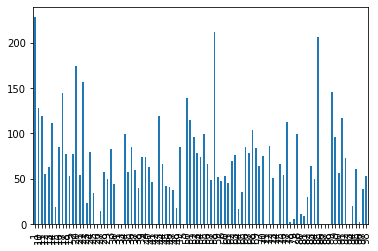

In [19]:
df_ppt.ppt.plot(kind = "bar")

In [99]:
gdf = gpd.GeoDataFrame(df_ppt, geometry=[Point(x, y) for x, y in zip(df_ppt.lon, df_ppt.lat)])
gdf = gdf.loc[gdf.ppt > 0]
# gdf.ppf = gdf.ppt
gdf.to_file("puntos.shp")

/opt/homebrew/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [64]:
rasterDs = gdal.Grid(rst_file, 
                     shp_file, 
                     format='GTiff',
                     algorithm='invdist', 
                     zfield='ppt')
rasterDs.FlushCache()

In [65]:
import rioxarray

In [66]:
ds = rioxarray.open_rasterio(rst_file)

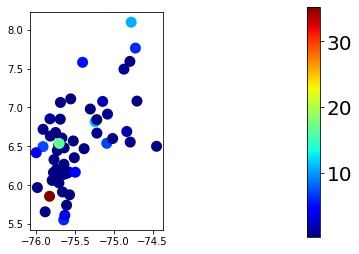

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
vmin = gdf.ppt.min()
vmax = gdf.ppt.max()
gdf.plot(ax=ax,column = "ppt",cmap = 'jet',legend = False, lw = 5, vmin = vmin, vmax = vmax)

cax = fig.add_axes([1, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax)
cbr.ax.tick_params(labelsize=20) 

In [73]:
len(gdf)

53

<AxesSubplot:>

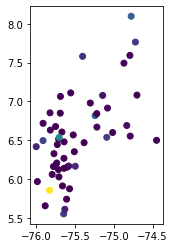

In [68]:
gdf.plot("ppt")

In [70]:
def simple_idw(x, y, z, xi, yi):
    dist = distance_matrix(x,y, xi,yi)

    # In IDW, weights are 1 / distance
    weights = 1.0 / dist

    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    zi = np.dot(weights.T, z)
    return zi

In [ ]:
bins = 

In [20]:
np.logspace(0, 100, 10)

array([1.00000000e+000, 1.29154967e+011, 1.66810054e+022, 2.15443469e+033,
       2.78255940e+044, 3.59381366e+055, 4.64158883e+066, 5.99484250e+077,
       7.74263683e+088, 1.00000000e+100])

In [23]:
from scipy.spatial import cKDTree

In [33]:
def distance(p1, p2):
    print(p1)
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def gaussian(center, coordinates, values, dist, min_val = 0, max_val = 1):
    
    weights = []
    
    for c in coordinates:
        weights.append((1 - distance(center, c)/dist) * max_val)
        
    return np.sum(np.array(values) * np.array(weights))
    
    
    